In [1]:

import torch
import requests

from models.clipseg import CLIPDensePredT

from torchvision import transforms
from matplotlib import pyplot as plt
from PIL import Image

# load model
model = CLIPDensePredT(version='ViT-B/16', reduce_dim=64)
model.eval()

# non-strict, because we only stored decoder weights (not CLIP weights)
model.load_state_dict(torch.load('clipseg_weights/rd64-uni.pth', map_location=torch.device('cpu')), strict=False)

emb shape:  tensor([[ 1.7539e-01, -4.6275e-01,  3.4840e-02, -1.2942e-01, -3.6532e-02,
          3.5020e-01,  2.2498e-01, -3.1417e-01,  1.5636e-01,  5.9572e-02,
         -1.0612e-01, -1.6978e-01,  3.0793e-01, -2.7115e-01, -2.2341e-02,
         -8.7389e-03,  1.0585e-01, -9.4709e-02, -8.2797e-03, -3.3494e-02,
          1.8968e-01, -1.4665e-02, -5.6552e-01,  2.7737e-02,  1.1028e-01,
         -3.0643e-01, -2.4377e-01,  2.2616e-01,  8.2666e-02, -1.8232e-01,
          3.3878e-02, -1.8024e-01,  2.1397e-01, -1.0393e-01, -1.3667e-01,
         -7.0868e-02,  1.3807e-01,  1.4048e-03,  1.6319e-01,  3.0905e-02,
         -2.7480e-01, -1.3111e-01, -1.9317e-02, -2.2733e-01,  2.1166e-02,
         -6.7707e-02, -2.1577e-01,  6.5794e-02, -1.4136e-01,  9.7402e-02,
          1.0784e-01,  9.9016e-02, -1.9732e-01, -4.1166e-02,  4.2482e-02,
         -1.2706e-01,  2.3045e-01,  3.1005e-01, -3.2307e-02, -7.9296e-02,
         -1.7736e-01, -4.4067e-01, -6.5031e-02,  2.3319e-01, -1.5650e-01,
          1.3295e-01,  5.7

_IncompatibleKeys(missing_keys=['clip_model.positional_embedding', 'clip_model.text_projection', 'clip_model.logit_scale', 'clip_model.visual.class_embedding', 'clip_model.visual.positional_embedding', 'clip_model.visual.proj', 'clip_model.visual.conv1.weight', 'clip_model.visual.ln_pre.weight', 'clip_model.visual.ln_pre.bias', 'clip_model.visual.transformer.resblocks.0.attn.in_proj_weight', 'clip_model.visual.transformer.resblocks.0.attn.in_proj_bias', 'clip_model.visual.transformer.resblocks.0.attn.out_proj.weight', 'clip_model.visual.transformer.resblocks.0.attn.out_proj.bias', 'clip_model.visual.transformer.resblocks.0.ln_1.weight', 'clip_model.visual.transformer.resblocks.0.ln_1.bias', 'clip_model.visual.transformer.resblocks.0.mlp.c_fc.weight', 'clip_model.visual.transformer.resblocks.0.mlp.c_fc.bias', 'clip_model.visual.transformer.resblocks.0.mlp.c_proj.weight', 'clip_model.visual.transformer.resblocks.0.mlp.c_proj.bias', 'clip_model.visual.transformer.resblocks.0.ln_2.weight',

Load and normalize `example_image.jpg`. You can also load through an URL.

In [ ]:
# load and normalize image
input_image = Image.open('example_image.jpg')

# or load from URL...
# image_url = 'https://farm5.staticflickr.com/4141/4856248695_03475782dc_z.jpg'
# input_image = Image.open(requests.get(image_url, stream=True).raw)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((352, 352)),
])
img = transform(input_image).unsqueeze(0)

Predict and visualize (this might take a few seconds if running without GPU support)

In [ ]:
prompts = ['a glass', 'something to fill', 'wood', 'a jar']

# predict
with torch.no_grad():
    preds = model(img.repeat(4,1,1,1), prompts)[0]

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(input_image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];

e:\Program Files\Python310\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


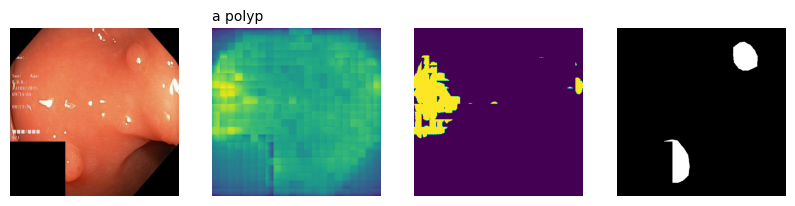

In [2]:
import cv2
import numpy as np




#process the image
# load and normalize image
input_image = Image.open('datasets/dataset/test/100.png')
mask = np.load('datasets/dataset/test/100.npy')


# or load from URL...
# image_url = 'https://farm5.staticflickr.com/4141/4856248695_03475782dc_z.jpg'
# input_image = Image.open(requests.get(image_url, stream=True).raw)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((352, 352)),
])

img = transform(input_image).unsqueeze(0)


prompts = ['a polyp']
# predict
with torch.no_grad():
    preds = model(img, prompts)[0]

#mask generation
filename = f"mask.png"
# here we save the second mask
plt.imsave(filename,torch.sigmoid(preds[0][0]))
img2 = cv2.imread(filename)
gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

(thresh, bw_image) = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

# fix color format
cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)

# Image.fromarray(bw_image)

# visualize prediction
_, ax = plt.subplots(1, 4, figsize=(10, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(input_image)
ax[1].imshow(torch.sigmoid(preds[0][0]))
ax[1].text(0, -15, prompts[0])
ax[2].imshow(bw_image)
ax[3].imshow(mask, cmap='gray')